In [1]:
import findspark
findspark.init()

In [236]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [3]:
spark.version

'3.0.3'

In [4]:
spark.createDataFrame([("Java","10000"),("Python","10000"),("Scala","5000")]).show()

+------+-----+
|    _1|   _2|
+------+-----+
|  Java|10000|
|Python|10000|
| Scala| 5000|
+------+-----+



In [6]:
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd = spark.sparkContext.parallelize(data)

In [7]:
rdd.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [8]:
rdd2 = spark.sparkContext.textFile("/path/textFile.txt")

In [9]:
rdd3 = spark.sparkContext.wholeTextFiles("/path/textFile.txt")

In [10]:
transRDD = spark.sparkContext.textFile("trans.txt")

In [11]:
transRDD.collect()

['00000000,06-26-2011,4000001,040.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit',
 '00000001,05-26-2011,4000002,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit',
 '00000002,06-01-2011,4000002,005.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit',
 '00000003,06-05-2011,4000003,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit',
 '00000004,12-17-2011,4000002,098.81,Team Sports,Field Hockey,Nashville  ,Tennessee,credit',
 '00000005,02-14-2011,4000004,193.63,Outdoor Recreation,Camping & Backpacking & Hiking,Chicago,Illinois,credit',
 '00000006,10-28-2011,4000005,027.89,Puzzles,Jigsaw Puzzles,Charleston,South Carolina,credit',
 '00000007,07-14-2011,4000006,096.01,Outdoor Play Equipment,Sandboxes,Columbus,Ohio,credit',
 '00000008,01-17-2011,4000006,010.44,Winter Sports,Snowmobiling,Des Moines,Iowa,credit',
 '00000009,05-17-2011,4000006,152.46,Jumping,Bungee Jumping,St. Petersburg,Florida,

In [12]:
transRDD.flatMap(lambda y: y.split(",")).collect()

['00000000',
 '06-26-2011',
 '4000001',
 '040.33',
 'Exercise & Fitness',
 'Cardio Machine Accessories',
 'Clarksville',
 'Tennessee',
 'credit',
 '00000001',
 '05-26-2011',
 '4000002',
 '198.44',
 'Exercise & Fitness',
 'Weightlifting Gloves',
 'Long Beach',
 'California',
 'credit',
 '00000002',
 '06-01-2011',
 '4000002',
 '005.58',
 'Exercise & Fitness',
 'Weightlifting Machine Accessories',
 'Anaheim',
 'California',
 'credit',
 '00000003',
 '06-05-2011',
 '4000003',
 '198.19',
 'Gymnastics',
 'Gymnastics Rings',
 'Milwaukee',
 'Wisconsin',
 'credit',
 '00000004',
 '12-17-2011',
 '4000002',
 '098.81',
 'Team Sports',
 'Field Hockey',
 'Nashville  ',
 'Tennessee',
 'credit',
 '00000005',
 '02-14-2011',
 '4000004',
 '193.63',
 'Outdoor Recreation',
 'Camping & Backpacking & Hiking',
 'Chicago',
 'Illinois',
 'credit',
 '00000006',
 '10-28-2011',
 '4000005',
 '027.89',
 'Puzzles',
 'Jigsaw Puzzles',
 'Charleston',
 'South Carolina',
 'credit',
 '00000007',
 '07-14-2011',
 '4000006',
 

In [13]:
transRDD.map(lambda x: x.split(",")).collect()

[['00000000',
  '06-26-2011',
  '4000001',
  '040.33',
  'Exercise & Fitness',
  'Cardio Machine Accessories',
  'Clarksville',
  'Tennessee',
  'credit'],
 ['00000001',
  '05-26-2011',
  '4000002',
  '198.44',
  'Exercise & Fitness',
  'Weightlifting Gloves',
  'Long Beach',
  'California',
  'credit'],
 ['00000002',
  '06-01-2011',
  '4000002',
  '005.58',
  'Exercise & Fitness',
  'Weightlifting Machine Accessories',
  'Anaheim',
  'California',
  'credit'],
 ['00000003',
  '06-05-2011',
  '4000003',
  '198.19',
  'Gymnastics',
  'Gymnastics Rings',
  'Milwaukee',
  'Wisconsin',
  'credit'],
 ['00000004',
  '12-17-2011',
  '4000002',
  '098.81',
  'Team Sports',
  'Field Hockey',
  'Nashville  ',
  'Tennessee',
  'credit'],
 ['00000005',
  '02-14-2011',
  '4000004',
  '193.63',
  'Outdoor Recreation',
  'Camping & Backpacking & Hiking',
  'Chicago',
  'Illinois',
  'credit'],
 ['00000006',
  '10-28-2011',
  '4000005',
  '027.89',
  'Puzzles',
  'Jigsaw Puzzles',
  'Charleston',
  'S

In [14]:
transRDD.map(lambda x: x.split(",")).count()

60

In [15]:
transRDD.flatMap(lambda x: x.split(",")).count()

540

In [16]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).collect()

[('4000001', '040.33'),
 ('4000002', '198.44'),
 ('4000002', '005.58'),
 ('4000003', '198.19'),
 ('4000002', '098.81'),
 ('4000004', '193.63'),
 ('4000005', '027.89'),
 ('4000006', '096.01'),
 ('4000006', '010.44'),
 ('4000006', '152.46'),
 ('4000007', '180.28'),
 ('4000009', '121.39'),
 ('4000009', '041.52'),
 ('4000010', '107.80'),
 ('4000010', '036.81'),
 ('4000001', '137.64'),
 ('4000010', '035.56'),
 ('4000008', '075.55'),
 ('4000008', '088.65'),
 ('4000008', '051.81'),
 ('4000005', '041.55'),
 ('4000005', '045.79'),
 ('4000009', '019.64'),
 ('4000009', '099.50'),
 ('4000003', '151.20'),
 ('4000009', '144.20'),
 ('4000009', '031.58'),
 ('4000010', '066.40'),
 ('4000008', '079.78'),
 ('4000001', '126.90'),
 ('4000001', '047.05'),
 ('4000008', '005.03'),
 ('4000008', '020.13'),
 ('4000008', '154.15'),
 ('4000008', '098.96'),
 ('4000008', '185.26'),
 ('4000007', '035.66'),
 ('4000007', '020.20'),
 ('4000007', '150.60'),
 ('4000006', '174.36'),
 ('4000005', '165.10'),
 ('4000004', '02

In [17]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).reduceByKey(lambda x1,x2: float(x1)+float(x2)).collect()

[('4000004', 337.06),
 ('4000007', 699.55),
 ('4000008', 859.42),
 ('4000001', 651.0500000000001),
 ('4000002', 706.97),
 ('4000003', 527.5899999999999),
 ('4000005', 325.15),
 ('4000006', 539.3800000000001),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003)]

In [18]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).reduceByKey(lambda x1,x2: float(x1)+float(x2)).sortBy(lambda x: x[1], False).collect()

[('4000008', 859.42),
 ('4000002', 706.97),
 ('4000007', 699.55),
 ('4000001', 651.0500000000001),
 ('4000006', 539.3800000000001),
 ('4000003', 527.5899999999999),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003),
 ('4000004', 337.06),
 ('4000005', 325.15)]

In [19]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).reduceByKey(lambda x1,x2: float(x1)+float(x2)).sortByKey().collect()

[('4000001', 651.0500000000001),
 ('4000002', 706.97),
 ('4000003', 527.5899999999999),
 ('4000004', 337.06),
 ('4000005', 325.15),
 ('4000006', 539.3800000000001),
 ('4000007', 699.55),
 ('4000008', 859.42),
 ('4000009', 457.83),
 ('4000010', 447.09000000000003)]

In [20]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[4])).filter(lambda x: ("Sport" in x[1])).collect()

[('4000002', 'Team Sports'),
 ('4000006', 'Winter Sports'),
 ('4000010', 'Team Sports'),
 ('4000001', 'Combat Sports'),
 ('4000008', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000008', 'Water Sports'),
 ('4000005', 'Air Sports'),
 ('4000009', 'Water Sports'),
 ('4000003', 'Water Sports'),
 ('4000009', 'Combat Sports'),
 ('4000008', 'Team Sports'),
 ('4000001', 'Water Sports'),
 ('4000008', 'Team Sports'),
 ('4000008', 'Team Sports'),
 ('4000007', 'Team Sports'),
 ('4000005', 'Team Sports'),
 ('4000004', 'Water Sports'),
 ('4000001', 'Water Sports'),
 ('4000002', 'Water Sports'),
 ('4000004', 'Water Sports'),
 ('4000006', 'Water Sports'),
 ('4000002', 'Water Sports'),
 ('4000001', 'Winter Sports')]

In [26]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[4])).distinct().reduceByKey(lambda x1,x2: x1 + (';') + x2).filter(lambda x: ("Water Sports" in x[1])).collect()

[('4000008',
  'Water Sports;Team Sports;Games;Outdoor Play Equipment;Outdoor Recreation'),
 ('4000004', 'Indoor Games;Water Sports;Outdoor Recreation'),
 ('4000003', 'Gymnastics;Outdoor Recreation;Water Sports'),
 ('4000006', 'Jumping;Outdoor Play Equipment;Winter Sports;Water Sports'),
 ('4000001',
  'Combat Sports;Outdoor Recreation;Gymnastics;Exercise & Fitness;Water Sports;Winter Sports'),
 ('4000009',
  'Gymnastics;Combat Sports;Outdoor Play Equipment;Indoor Games;Water Sports'),
 ('4000002', 'Outdoor Recreation;Exercise & Fitness;Team Sports;Water Sports')]

In [27]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).countByKey()

defaultdict(int,
            {'4000001': 8,
             '4000002': 6,
             '4000003': 3,
             '4000004': 5,
             '4000005': 5,
             '4000006': 5,
             '4000007': 6,
             '4000009': 6,
             '4000010': 6,
             '4000008': 10})

In [28]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[4])).sortByKey().countByKey()

defaultdict(int,
            {'4000001': 8,
             '4000002': 6,
             '4000003': 3,
             '4000004': 5,
             '4000005': 5,
             '4000006': 5,
             '4000007': 6,
             '4000008': 10,
             '4000009': 6,
             '4000010': 6})

In [29]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).reduceByKey(lambda x1,x2: float(x1)+float(x2)).sortBy(lambda x: x[1]).collect()

[('4000005', 325.15),
 ('4000004', 337.06),
 ('4000010', 447.09000000000003),
 ('4000009', 457.83),
 ('4000003', 527.5899999999999),
 ('4000006', 539.3800000000001),
 ('4000001', 651.0500000000001),
 ('4000007', 699.55),
 ('4000002', 706.97),
 ('4000008', 859.42)]

In [52]:
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[4])).sortByKey().countByKey().collect()
transRDD.map(lambda x: x.split(",")).map(lambda x: (x[2],x[3])).reduceByKey(lambda x1,x2: (float(x1)+float(x2))).collect()

AttributeError: 'collections.defaultdict' object has no attribute 'collect'

In [54]:
print(transRDDT2)

PythonRDD[247] at RDD at PythonRDD.scala:53


In [55]:
columns = ["language", "users_Count"]
data = [("Java","20000"),("Python","100000"),("Scala","3000")]
rdd = spark.sparkContext.parallelize(data)

In [56]:
rdd.collect()

[('Java', '20000'), ('Python', '100000'), ('Scala', '3000')]

In [57]:
dfFromRDD1 = rdd.toDF()
dfFromRDD1.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)



In [58]:
dfFromRDD1 = rdd.toDF(columns)
dfFromRDD1.printSchema()

root
 |-- language: string (nullable = true)
 |-- users_Count: string (nullable = true)



In [59]:
dfFromRDD2 = spark.createDataFrame(rdd).toDF(*columns)
dfFromRDD2.printSchema()

root
 |-- language: string (nullable = true)
 |-- users_Count: string (nullable = true)



In [60]:
dfFromRDD1.show()

+--------+-----------+
|language|users_Count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [61]:
dfFromRDD2.show()

+--------+-----------+
|language|users_Count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [62]:
data = [("Java","20000"),("Python","100000"),("Scala","3000")]
dfFromRDD2 = spark.createDataFrame(data).toDF(*columns)
dfFromRDD2.show()

+--------+-----------+
|language|users_Count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [63]:
from pyspark.sql import Row
rowData = map(lambda x: Row(*x), data)
dfFromRDD3 = spark.createDataFrame(rowData, columns)
dfFromRDD3.show()

+--------+-----------+
|language|users_Count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [64]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
data2 = [("James","","Smith","36636","M",3000),
         ("Maria","Anne","Jones","39192","F",4000),
         ("Jen","Mary","Brown","","F",-1)
        ]
schema1 = StructType([
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id",StringType(),True), \
    StructField("gender",StringType(),True), \
    StructField("salary",IntegerType(),True), \
])

df = spark.createDataFrame(data = data2, schema= schema1)
df.printSchema()
df.show()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|   id|gender|salary|
+---------+----------+--------+-----+------+------+
|    James|          |   Smith|36636|     M|  3000|
|    Maria|      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
+---------+----------+--------+-----+------+------+



In [65]:
df = spark.read.csv("zipcodes.csv")
df.printSchema()
df.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [66]:
df = spark.read.format("csv").load("zipcodes.csv")
df.show()

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|                _c3|  _c4|           _c5|  _c6|    _c7|  _c8|  _c9| _c10|       _c11|   _c12|                _c13|                _c14|         _c15|           _c16|               _c17|      _c18|         _c19|
+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|RecordNumber|Zipcode|ZipCodeType|               City|State|  LocationType|  Lat|   Long|Xaxis|Yaxis|Zaxis|WorldRegion|Country|        LocationText|            Location|Decommisioned|TaxReturnsFiled|EstimatedPopulation|TotalWages|        Notes|
|           1|    70

In [67]:
df2 = spark.read.option("header",True).csv("zipcodes.csv")
df2.printSchema()
df2.show()

root
 |-- RecordNumber: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Xaxis: string (nullable = true)
 |-- Yaxis: string (nullable = true)
 |-- Zaxis: string (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: string (nullable = true)
 |-- TaxReturnsFiled: string (nullable = true)
 |-- EstimatedPopulation: string (nullable = true)
 |-- TotalWages: string (nullable = true)
 |-- Notes: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+------------

In [78]:
dftest1 = spark.read.csv('/E:/spark/spark-3.0.3-bin-hadoop2.7/BTGK/trans.txt')
dftest1.show(200)

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|     _c0|       _c1|    _c2|   _c3|                 _c4|                 _c5|           _c6|           _c7|   _c8|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|00000000|06-26-2011|4000001|040.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|00000001|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|00000002|06-01-2011|4000002|005.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|00000003|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|00000004|12-17-2011|4000002|098.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|00000005|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [286]:
df3 = spark.read.options(delimiter=',').csv("zipcodes.csv")
df3.printSchema()
df3.show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|     

In [79]:
df4 = spark.read.options(inferSchema='True',delimiter=',').csv("zipcodes.csv")
df4.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)



In [80]:
df3 = spark.read.options(inferSchema='True',delimiter=',').csv("zipcodesNoHeader.csv")
df3.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: boolean (nullable = true)
 |-- _c16: integer (nullable = true)
 |-- _c17: integer (nullable = true)
 |-- _c18: integer (nullable = true)
 |-- _c19: string (nullable = true)



In [81]:
df3 = spark.read.options(header = 'true', inferSchema = 'false', delimiter = ',').csv("zipcodes.csv")
df3.printSchema()

root
 |-- RecordNumber: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: string (nullable = true)
 |-- Long: string (nullable = true)
 |-- Xaxis: string (nullable = true)
 |-- Yaxis: string (nullable = true)
 |-- Zaxis: string (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: string (nullable = true)
 |-- TaxReturnsFiled: string (nullable = true)
 |-- EstimatedPopulation: string (nullable = true)
 |-- TotalWages: string (nullable = true)
 |-- Notes: string (nullable = true)



In [82]:
from pyspark.sql.types import *
schema = StructType() \
.add ("RecordNumber", IntegerType(), True)\
.add ("Zipcode" ,IntegerType() ,True)\
.add ("ZipCodeType" ,StringType(), True)\
.add ("City" ,StringType(), True)\
.add ("State", StringType(), True)\
.add ("LocationType", StringType(), True)\
.add ("Lat" ,DoubleType(), True)\
.add ("Long" ,DoubleType(), True)\
.add ("Xaxis", IntegerType(), True)\
.add ("Yaxis", DoubleType(), True)\
.add ("Zaxis", DoubleType(), True)\
.add ("WorldRegion", StringType(), True)\
.add ("Country" ,StringType(), True)\
.add ("LocationText" ,StringType(), True)\
.add ("Location" ,StringType() ,True)\
.add ("Decommisioned" ,BooleanType(), True)\
.add ("TaxReturnsFiled", StringType(), True)\
.add ("EstimatedPopulation" ,IntegerType(), True)\
.add ("TotalWages", IntegerType(), True)\
.add ("Notes" ,StringType(), True)
      
df_with_schema = spark.read.format("csv").option("header",True).schema(schema).load("zipcodes.csv")
df_with_schema.printSchema()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Xaxis: integer (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- TaxReturnsFiled: string (nullable = true)
 |-- EstimatedPopulation: integer (nullable = true)
 |-- TotalWages: integer (nullable = true)
 |-- Notes: string (nullable = true)



In [83]:
transDF = spark.read.options(delimiter=',').schema('trans_id INT, date STRING, cust_ID INT, amount DOUBLE, game STRING, equipment STRING, city STRING, state STRING, mode STRING').csv("trans.txt")
transDF.printSchema()
transDF.show()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Ma

In [84]:
df.show()

+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|         _c0|    _c1|        _c2|                _c3|  _c4|           _c5|  _c6|    _c7|  _c8|  _c9| _c10|       _c11|   _c12|                _c13|                _c14|         _c15|           _c16|               _c17|      _c18|         _c19|
+------------+-------+-----------+-------------------+-----+--------------+-----+-------+-----+-----+-----+-----------+-------+--------------------+--------------------+-------------+---------------+-------------------+----------+-------------+
|RecordNumber|Zipcode|ZipCodeType|               City|State|  LocationType|  Lat|   Long|Xaxis|Yaxis|Zaxis|WorldRegion|Country|        LocationText|            Location|Decommisioned|TaxReturnsFiled|EstimatedPopulation|TotalWages|        Notes|
|           1|    70

In [88]:
df.write.option("header",True).csv("newzipcodes")

AnalysisException: path file:/E:/spark/spark-3.0.3-bin-hadoop2.7/BTGK/newzipcodes already exists.;

In [89]:
df2.write.options(header='True', delimiter=',').csv("newzipcodes")

AnalysisException: path file:/E:/spark/spark-3.0.3-bin-hadoop2.7/BTGK/newzipcodes already exists.;

In [90]:
df2.write.mode('overwrite').csv("newzipcodes")

Py4JJavaError: An error occurred while calling o1606.csv.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:231)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:178)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:108)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:106)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.doExecute(commands.scala:131)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:127)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:126)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:962)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:767)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:962)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:414)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:398)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:287)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:952)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 155.0 failed 1 times, most recent failure: Lost task 0.0 in stage 155.0 (TID 307, vannhinh-ng02.ea.corp.samsungelectronics.net, executor driver): java.io.IOException: (null) entry in command string: null chmod 0644 E:\spark\spark-3.0.3-bin-hadoop2.7\BTGK\newzipcodes\_temporary\0\_temporary\attempt_202112171247472039298821884897827_0155_m_000000_307\part-00000-3460f4cc-8ecf-4edf-be1b-43553d088430-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:126)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:111)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:210)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:463)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:466)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2114)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:200)
	... 33 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 E:\spark\spark-3.0.3-bin-hadoop2.7\BTGK\newzipcodes\_temporary\0\_temporary\attempt_202112171247472039298821884897827_0155_m_000000_307\part-00000-3460f4cc-8ecf-4edf-be1b-43553d088430-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:126)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:111)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:210)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:463)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:466)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [91]:
df = spark.read.text("zipcodes.txt")
df.printSchema()
df.collect()

root
 |-- value: string (nullable = true)



[Row(value='RecordNumber\tZipcode\tZipCodeType\tCity\tState\tLocationType'),
 Row(value='1\t704\tSTANDARD\tPARC PARQUE\tPR\tNOT ACCEPTABLE'),
 Row(value='2\t704\tSTANDARD\tPASEO COSTA DEL SUR\tPR\tNOT ACCEPTABLE'),
 Row(value='10\t709\tSTANDARD\tBDA SAN LUIS\tPR\tNOT ACCEPTABLE'),
 Row(value='61391\t76166\tUNIQUE\tCINGULAR WIRELESS\tTX\tNOT ACCEPTABLE'),
 Row(value='61392\t76177\tSTANDARD\tFORT WORTH\tTX\tPRIMARY'),
 Row(value='61393\t76177\tSTANDARD\tFT WORTH\tTX\tACCEPTABLE'),
 Row(value='4\t704\tSTANDARD\tURB EUGENE RICE\tPR\tNOT ACCEPTABLE'),
 Row(value='39827\t85209\tSTANDARD\tMESA\tAZ\tPRIMARY'),
 Row(value='39828\t85210\tSTANDARD\tMESA\tAZ\tPRIMARY'),
 Row(value='49345\t32046\tSTANDARD\tHILLIARD\tFL\tPRIMARY'),
 Row(value='49346\t34445\tPO BOX\tHOLDER\tFL\tPRIMARY'),
 Row(value='49347\t32564\tSTANDARD\tHOLT\tFL\tPRIMARY'),
 Row(value='49348\t34487\tPO BOX\tHOMOSASSA\tFL\tPRIMARY'),
 Row(value='10\t708\tSTANDARD\tBDA SAN LUIS\tPR\tNOT ACCEPTABLE'),
 Row(value='3\t704\tSTANDARD\tS

In [95]:
df = spark.read.options(header='True',inferSchema='True', delimiter='\t').csv("zipcodes.txt")
df.printSchema()
df.show()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- LocationType: string (nullable = true)

+------------+-------+-----------+-------------------+-----+--------------+
|RecordNumber|Zipcode|ZipCodeType|               City|State|  LocationType|
+------------+-------+-----------+-------------------+-----+--------------+
|           1|    704|   STANDARD|        PARC PARQUE|   PR|NOT ACCEPTABLE|
|           2|    704|   STANDARD|PASEO COSTA DEL SUR|   PR|NOT ACCEPTABLE|
|          10|    709|   STANDARD|       BDA SAN LUIS|   PR|NOT ACCEPTABLE|
|       61391|  76166|     UNIQUE|  CINGULAR WIRELESS|   TX|NOT ACCEPTABLE|
|       61392|  76177|   STANDARD|         FORT WORTH|   TX|       PRIMARY|
|       61393|  76177|   STANDARD|           FT WORTH|   TX|    ACCEPTABLE|
|           4|    704|   STANDARD|    URB EUGENE RICE|   PR|NOT A

In [96]:
transDF = spark.read.options(delimiter=',').schema('trans_id INT, date STRING, cust_id INT, amount DOUBLE, game STRING, equipment STRING, city STRING, state STRING, mode STRING').csv("trans.txt")

In [97]:
transDF.printSchema()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_id: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)



In [98]:
transDF.show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [99]:
transDF.select('cust_id','amount').show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows



In [100]:
transDF.select(transDF.cust_id,transDF.amount).show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows



In [101]:
transDF.select(transDF['cust_id'],transDF['amount']).show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows



In [102]:
twocolumns=['cust_id','amount']
transDF.select(twocolumns).show()

+-------+------+
|cust_id|amount|
+-------+------+
|4000001| 40.33|
|4000002|198.44|
|4000002|  5.58|
|4000003|198.19|
|4000002| 98.81|
|4000004|193.63|
|4000005| 27.89|
|4000006| 96.01|
|4000006| 10.44|
|4000006|152.46|
|4000007|180.28|
|4000009|121.39|
|4000009| 41.52|
|4000010| 107.8|
|4000010| 36.81|
|4000001|137.64|
|4000010| 35.56|
|4000008| 75.55|
|4000008| 88.65|
|4000008| 51.81|
+-------+------+
only showing top 20 rows



In [103]:
transDF.select([col for col in transDF.columns]).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [104]:
transDF.select('*').show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [105]:
from pyspark.sql.functions import col
transDF.withColumn('trans_id',col('trans_id').cast('String')).printSchema()

root
 |-- trans_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_id: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)



In [109]:
transDF.withColumn('trans_id',col('trans_id').cast('integer')).printSchema()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_id: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)



In [110]:
transDF.show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [117]:
from pyspark.sql.functions import col
transDF.withColumn('amount',col('amount')*2).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 80.66|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|396.88|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002| 11.16|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|396.38|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002|197.62|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|387.26|  Outdoor Recreation|Camping & Backp

In [118]:
from pyspark.sql.functions import col
transDF.withColumn('new amount',col('amount')*2).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+----------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|new amount|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+----------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|     80.66|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|    396.88|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|     11.16|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|    396.38|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|cre

In [119]:
from pyspark.sql.functions import lit
transDF.withColumn("Country", lit("USA")).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+-------+
|trans_id|      date|cust_id|amount|                game|           equipment|          city|         state|  mode|Country|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+-------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|    USA|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|    USA|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|    USA|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|    USA|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|    USA|
|       

In [120]:
from pyspark.sql.functions import lit
transDF.withColumnRenamed('amount','cost').show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_id|  cost|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [121]:
from pyspark.sql.types import StructType,StructField
from pyspark.sql.types import StringType, IntegerType, ArrayType
data = [
(("James","","Smith"),["Java","Scala","C++"],"OH","M"),
(("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
(("Julia","","Williams"),["CSharp","VB"],"OH","F"),
(("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
(("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
(("Mike","Mary","Williams"),["Python","VB"],"OH","M")
]
schema = StructType([
StructField('name', StructType([
StructField('firstname', StringType(), True),
StructField('middlename', StringType(), True),
StructField('lastname', StringType(), True)
])),
StructField('languages', ArrayType(StringType()), True),
StructField('state', StringType(), True),
StructField('gender', StringType(), True)
])
df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate=False)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]        |[Spark, Java, C++]|NY   |F     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Maria, Anne, Jones]  |[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]    |[CSharp, VB]      |NY   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [123]:
df.filter(df['state'] == "OH").show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [124]:
df.filter(df.state != "OH").show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [125]:
df.filter(~(df.state == "OH")).show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [126]:
from pyspark.sql.functions import col
df.filter(col("state") == "OH").show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [127]:
df.filter("gender == 'M'").show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [128]:
df.filter("gender != 'M'").show()

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , Williams]|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+



In [129]:
df.filter("gender <> 'M'").show()

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , Williams]|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+



In [130]:
df.filter((df.state == 'OH') & (df.gender =='M')).show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [131]:
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [132]:
df.filter(~df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



In [133]:
df.filter(df.state.isin(li) == False).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



In [134]:
df.filter(df.state.startswith("N")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



In [135]:
df.filter(df.state.endswith("H")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [136]:
df.filter(df.state.contains("Y")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



In [137]:
data2 = [(2,"Michael Rose"),(3,"Robert Williams"),(4,"Rames Rose"),(5,"Rames rose")]
df2 = spark.createDataFrame(data = data2, schema=["id","name"])

In [138]:
df2.filter(df2.name.like("%rose%")).show()

+---+----------+
| id|      name|
+---+----------+
|  5|Rames rose|
+---+----------+



In [139]:
df2.filter(df2.name.rlike("(?i)^*rose$")).show()

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+



In [142]:
from pyspark.sql.functions import array_contains
df.filter(array_contains(df.languages,"Java")).show()

+----------------+------------------+-----+------+
|            name|         languages|state|gender|
+----------------+------------------+-----+------+
|[James, , Smith]|[Java, Scala, C++]|   OH|     M|
|  [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
+----------------+------------------+-----+------+



In [143]:
df.filter(df.name.lastname =="Williams").show(truncate=False)

+----------------------+------------+-----+------+
|name                  |languages   |state|gender|
+----------------------+------------+-----+------+
|[Julia, , Williams]   |[CSharp, VB]|OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]|OH   |M     |
+----------------------+------------+-----+------+



In [144]:
df.where(df.name.lastname =="Williams").show(truncate=False)

+----------------------+------------+-----+------+
|name                  |languages   |state|gender|
+----------------------+------------+-----+------+
|[Julia, , Williams]   |[CSharp, VB]|OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]|OH   |M     |
+----------------------+------------+-----+------+



In [145]:
transDF.select('cust_id','game').count()

60

In [146]:
transDF.select('cust_id','game').distinct().count()

43

In [147]:
dropDisDF = transDF.dropDuplicates(['cust_id','game'])
print("Distinct count of customer ID & game : " + str(dropDisDF.count()))
dropDisDF.show(truncate = False)

Distinct count of customer ID & game : 43
+--------+----------+-------+------+----------------------+-------------------+-------------+--------------+------+
|trans_id|date      |cust_id|amount|game                  |equipment          |city         |state         |mode  |
+--------+----------+-------+------+----------------------+-------------------+-------------+--------------+------+
|13      |03-13-2011|4000010|107.8 |Team Sports           |Field Hockey       |Honolulu     |Hawaii        |credit|
|48      |09-27-2011|4000007|157.94|Exercise & Fitness    |Exercise Bands     |Philadelphia |Pennsylvania  |credit|
|20      |06-29-2011|4000005|41.55 |Exercise & Fitness    |Weightlifting Belts|New Orleans  |Louisiana     |credit|
|33      |06-15-2011|4000008|154.15|Outdoor Recreation    |Lawn Games         |Nashville    |Tennessee     |credit|
|49      |07-12-2011|4000010|144.59|Jumping               |Jumping Stilts     |Cambridge    |Massachusetts |credit|
|46      |05-27-2011|4000001|5

In [148]:
transDF = spark.read.options(delimiter=',')\
.schema('trans_id INT, date STRING, cust_ID INT, amount DOUBLE, game STRING, equipment STRING, city STRING, state STRING, mode STRING')\
.csv("trans.txt")

transDF.show(2,truncate=False)

+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
|trans_id|date      |cust_ID|amount|game              |equipment                 |city       |state     |mode  |
+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
|0       |06-26-2011|4000001|40.33 |Exercise & Fitness|Cardio Machine Accessories|Clarksville|Tennessee |credit|
|1       |05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves      |Long Beach |California|credit|
+--------+----------+-------+------+------------------+--------------------------+-----------+----------+------+
only showing top 2 rows



In [149]:
transDF.sort('amount',ascending = False).show(10,truncate=False)

+--------+----------+-------+------+----------------------+------------------------------+-------------+-------------+------+
|trans_id|date      |cust_ID|amount|game                  |equipment                     |city         |state        |mode  |
+--------+----------+-------+------+----------------------+------------------------------+-------------+-------------+------+
|1       |05-26-2011|4000002|198.44|Exercise & Fitness    |Weightlifting Gloves          |Long Beach   |California   |credit|
|3       |06-05-2011|4000003|198.19|Gymnastics            |Gymnastics Rings              |Milwaukee    |Wisconsin    |credit|
|58      |12-29-2011|4000002|194.86|Water Sports          |Windsurfing                   |Oklahoma City|Oklahoma     |credit|
|5       |02-14-2011|4000004|193.63|Outdoor Recreation    |Camping & Backpacking & Hiking|Chicago      |Illinois     |credit|
|35      |04-12-2011|4000008|185.26|Games                 |Board Games                   |Centennial   |Colorado     |

In [172]:
from pyspark.sql.functions import when
transDF.withColumn('state',when(transDF.cust_ID=='4000002','vietnam').otherwise(transDF.state)) \
    .withColumn('mode',when(transDF.cust_ID=='4000002','cash').otherwise(transDF.mode)).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|       vietnam|  cash|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|       vietnam|  cash|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |       vietnam|  cash|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [173]:
transDF.groupBy('cust_ID').count().sort('cust_id').show()

+-------+-----+
|cust_ID|count|
+-------+-----+
|4000001|    8|
|4000002|    6|
|4000003|    3|
|4000004|    5|
|4000005|    5|
|4000006|    5|
|4000007|    6|
|4000008|   10|
|4000009|    6|
|4000010|    6|
+-------+-----+



In [174]:
transDF.groupBy('cust_id').min().show(5)

+-------+-------------+------------+-----------+
|cust_id|min(trans_id)|min(cust_ID)|min(amount)|
+-------+-------------+------------+-----------+
|4000009|           11|     4000009|      19.64|
|4000001|            0|     4000001|      21.43|
|4000006|            7|     4000006|      10.44|
|4000005|            6|     4000005|      27.89|
|4000008|           17|     4000008|       5.03|
+-------+-------------+------------+-----------+
only showing top 5 rows



In [181]:
transDF.groupBy('cust_id').min('amount').show(5)

+-------+-----------+
|cust_id|min(amount)|
+-------+-----------+
|4000009|      19.64|
|4000001|      21.43|
|4000006|      10.44|
|4000005|      27.89|
|4000008|       5.03|
+-------+-----------+
only showing top 5 rows



In [186]:
from pyspark.sql import functions as f
transDF.groupBy('cust_ID').agg(f.min('amount').alias('min_transaction_amount')).show(5)

+-------+----------------------+
|cust_ID|min_transaction_amount|
+-------+----------------------+
|4000009|                 19.64|
|4000001|                 21.43|
|4000006|                 10.44|
|4000005|                 27.89|
|4000008|                  5.03|
+-------+----------------------+
only showing top 5 rows



In [187]:
transDF.groupBy('cust_id').agg(f.min('amount').alias('min_trans')).show()

+-------+---------+
|cust_id|min_trans|
+-------+---------+
|4000009|    19.64|
|4000001|    21.43|
|4000006|    10.44|
|4000005|    27.89|
|4000008|     5.03|
|4000004|    28.11|
|4000003|    151.2|
|4000010|    35.56|
|4000007|     20.2|
|4000002|     5.58|
+-------+---------+



In [188]:
transDF.groupBy('cust_id').agg(f.min('amount')).sort('cust_id').show()

+-------+-----------+
|cust_id|min(amount)|
+-------+-----------+
|4000001|      21.43|
|4000002|       5.58|
|4000003|      151.2|
|4000004|      28.11|
|4000005|      27.89|
|4000006|      10.44|
|4000007|       20.2|
|4000008|       5.03|
|4000009|      19.64|
|4000010|      35.56|
+-------+-----------+



In [189]:
transDF.groupBy('cust_id').sum('amount').show()

+-------+------------------+
|cust_id|       sum(amount)|
+-------+------------------+
|4000009|            457.83|
|4000001|            651.05|
|4000006|            539.38|
|4000005|            325.15|
|4000008|            859.42|
|4000004|            337.06|
|4000003| 527.5899999999999|
|4000010|447.09000000000003|
|4000007| 699.5500000000001|
|4000002|            706.97|
+-------+------------------+



In [190]:
transDF.groupBy('cust_id').agg(f.sum('amount').alias('total_amount')).show()

+-------+------------------+
|cust_id|      total_amount|
+-------+------------------+
|4000009|            457.83|
|4000001|            651.05|
|4000006|            539.38|
|4000005|            325.15|
|4000008|            859.42|
|4000004|            337.06|
|4000003| 527.5899999999999|
|4000010|447.09000000000003|
|4000007| 699.5500000000001|
|4000002|            706.97|
+-------+------------------+



In [191]:
transDF.groupBy('cust_ID').agg(f.first('game')).show()

+-------+--------------------+
|cust_ID|         first(game)|
+-------+--------------------+
|4000009|Outdoor Play Equi...|
|4000001|  Exercise & Fitness|
|4000006|Outdoor Play Equi...|
|4000005|             Puzzles|
|4000008|        Water Sports|
|4000004|  Outdoor Recreation|
|4000003|          Gymnastics|
|4000010|         Team Sports|
|4000007|  Outdoor Recreation|
|4000002|  Exercise & Fitness|
+-------+--------------------+



In [192]:
transDF.filter(transDF.cust_ID == 4000002).show()

+--------+----------+-------+------+------------------+--------------------+-------------+-------------+------+
|trans_id|      date|cust_ID|amount|              game|           equipment|         city|        state|  mode|
+--------+----------+-------+------+------------------+--------------------+-------------+-------------+------+
|       1|05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves|   Long Beach|   California|credit|
|       2|06-01-2011|4000002|  5.58|Exercise & Fitness|Weightlifting Mac...|      Anaheim|   California|credit|
|       4|12-17-2011|4000002| 98.81|       Team Sports|        Field Hockey|  Nashville  |    Tennessee|credit|
|      51|02-17-2011|4000002| 32.65|      Water Sports|        Life Jackets|     Columbus|      Georgia|  cash|
|      56|06-21-2011|4000002|176.63|Outdoor Recreation|          Geocaching|       Boston|Massachusetts|credit|
|      58|12-29-2011|4000002|194.86|      Water Sports|         Windsurfing|Oklahoma City|     Oklahoma|

In [202]:
t1 = transDF.groupBy('cust_id').agg(f.count('cust_id'))
t2 = transDF.groupBy('cust_id').agg(f.sum('amount'))
t3 = t1.join(t2,['cust_id'],"inner")
t3.sort('cust_id', ascending = False).show()

+-------+--------------+------------------+
|cust_id|count(cust_id)|       sum(amount)|
+-------+--------------+------------------+
|4000010|             6|447.09000000000003|
|4000009|             6|            457.83|
|4000008|            10|            859.42|
|4000007|             6| 699.5500000000001|
|4000006|             5|            539.38|
|4000005|             5|            325.15|
|4000004|             5|            337.06|
|4000003|             3| 527.5899999999999|
|4000002|             6|            706.97|
|4000001|             8|            651.05|
+-------+--------------+------------------+



In [205]:
transDF.groupBy('cust_ID').agg(f.countDistinct('game')).show()

+-------+-----------+
|cust_ID|count(game)|
+-------+-----------+
|4000009|          5|
|4000001|          6|
|4000006|          4|
|4000005|          5|
|4000008|          5|
|4000004|          3|
|4000003|          3|
|4000010|          5|
|4000007|          3|
|4000002|          4|
+-------+-----------+



In [206]:
transDF.groupBy('cust_ID').agg(f.collect_list('game')).show(5,truncate=False)

+-------+------------------------------------------------------------------------------------------------------------------------------------------+
|cust_ID|collect_list(game)                                                                                                                        |
+-------+------------------------------------------------------------------------------------------------------------------------------------------+
|4000009|[Outdoor Play Equipment, Indoor Games, Water Sports, Gymnastics, Indoor Games, Combat Sports]                                             |
|4000001|[Exercise & Fitness, Combat Sports, Outdoor Recreation, Water Sports, Water Sports, Exercise & Fitness, Gymnastics, Winter Sports]        |
|4000006|[Outdoor Play Equipment, Winter Sports, Jumping, Outdoor Play Equipment, Water Sports]                                                    |
|4000005|[Puzzles, Exercise & Fitness, Air Sports, Team Sports, Outdoor Play Equipment]                   

In [159]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [160]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [207]:
transDF.groupBy('cust_ID').agg(f.collect_set('game')).show(5,truncate=False)

+-------+------------------------------------------------------------------------------------------------+
|cust_ID|collect_set(game)                                                                               |
+-------+------------------------------------------------------------------------------------------------+
|4000009|[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |
|4000001|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|
|4000006|[Water Sports, Jumping, Winter Sports, Outdoor Play Equipment]                                  |
|4000005|[Puzzles, Team Sports, Air Sports, Exercise & Fitness, Outdoor Play Equipment]                  |
|4000008|[Team Sports, Water Sports, Outdoor Recreation, Games, Outdoor Play Equipment]                  |
+-------+------------------------------------------------------------------------------------------------+
only showing top 5 rows



In [208]:
transDF.groupBy('cust_ID').agg(f.collect_set('game')).filter(f.array_contains(f.col('collect_set(game)'),'Jumping')).show(5,truncate=False)

+-------+--------------------------------------------------------------+
|cust_ID|collect_set(game)                                             |
+-------+--------------------------------------------------------------+
|4000006|[Water Sports, Jumping, Winter Sports, Outdoor Play Equipment]|
|4000010|[Team Sports, Jumping, Gymnastics, Games, Exercise & Fitness] |
+-------+--------------------------------------------------------------+



In [209]:
transDF.groupBy('cust_ID').agg(f.collect_set('game')).withColumn('game_list_string',f.concat_ws(',',f.col('collect_set(game)'))).show(5,truncate=False)

+-------+------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+
|cust_ID|collect_set(game)                                                                               |game_list_string                                                                         |
+-------+------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+
|4000009|[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |
|4000001|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|
|4000006|[Water

In [210]:
transGameStringDF =  transDF.groupBy('cust_id').agg(f.collect_set('game')).withColumn('game_string',f.concat_ws(',',f.col('collect_set(game)'))).select('cust_ID','game_string')

In [211]:
transGameStringDF.show(5,truncate=False)

+-------+-----------------------------------------------------------------------------------------+
|cust_ID|game_string                                                                              |
+-------+-----------------------------------------------------------------------------------------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |
|4000001|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|
|4000006|Water Sports,Jumping,Winter Sports,Outdoor Play Equipment                                |
|4000005|Puzzles,Team Sports,Air Sports,Exercise & Fitness,Outdoor Play Equipment                 |
|4000008|Team Sports,Water Sports,Outdoor Recreation,Games,Outdoor Play Equipment                 |
+-------+-----------------------------------------------------------------------------------------+
only showing top 5 rows



In [215]:
transGameStringDF.withColumn('game_array',f.split('game_string',',')).show(5,truncate=False)

+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+
|cust_ID|game_string                                                                              |game_array                                                                                      |
+-------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------+
|4000009|Combat Sports,Water Sports,Indoor Games,Gymnastics,Outdoor Play Equipment                |[Combat Sports, Water Sports, Indoor Games, Gymnastics, Outdoor Play Equipment]                 |
|4000001|Combat Sports,Water Sports,Outdoor Recreation,Gymnastics,Winter Sports,Exercise & Fitness|[Combat Sports, Water Sports, Outdoor Recreation, Gymnastics, Winter Sports, Exercise & Fitness]|
|4000006|Water 

In [213]:
transGameStringDF.withColumn('game_array', f.split('game_string',',')).withColumn('num_game',f.size('game_array')).show(5,truncate=True)

+-------+--------------------+--------------------+--------+
|cust_ID|         game_string|          game_array|num_game|
+-------+--------------------+--------------------+--------+
|4000009|Combat Sports,Wat...|[Combat Sports, W...|       5|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|       6|
|4000006|Water Sports,Jump...|[Water Sports, Ju...|       4|
|4000005|Puzzles,Team Spor...|[Puzzles, Team Sp...|       5|
|4000008|Team Sports,Water...|[Team Sports, Wat...|       5|
+-------+--------------------+--------------------+--------+
only showing top 5 rows



In [216]:
transGameStringDF.withColumn('game_array',f.split('game_string',',')) \
.withColumn('first_game',f.element_at('game_array',1)) \
.withColumn('last_game',f.element_at('game_array',-1)).show(5)

+-------+--------------------+--------------------+-------------+--------------------+
|cust_ID|         game_string|          game_array|   first_game|           last_game|
+-------+--------------------+--------------------+-------------+--------------------+
|4000009|Combat Sports,Wat...|[Combat Sports, W...|Combat Sports|Outdoor Play Equi...|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|Combat Sports|  Exercise & Fitness|
|4000006|Water Sports,Jump...|[Water Sports, Ju...| Water Sports|Outdoor Play Equi...|
|4000005|Puzzles,Team Spor...|[Puzzles, Team Sp...|      Puzzles|Outdoor Play Equi...|
|4000008|Team Sports,Water...|[Team Sports, Wat...|  Team Sports|Outdoor Play Equi...|
+-------+--------------------+--------------------+-------------+--------------------+
only showing top 5 rows



In [218]:
transGameStringDF.withColumn('game_array',f.split('game_string',',')).withColumn('single_game',f.explode('game_array')).show()

+-------+--------------------+--------------------+--------------------+
|cust_ID|         game_string|          game_array|         single_game|
+-------+--------------------+--------------------+--------------------+
|4000009|Combat Sports,Wat...|[Combat Sports, W...|       Combat Sports|
|4000009|Combat Sports,Wat...|[Combat Sports, W...|        Water Sports|
|4000009|Combat Sports,Wat...|[Combat Sports, W...|        Indoor Games|
|4000009|Combat Sports,Wat...|[Combat Sports, W...|          Gymnastics|
|4000009|Combat Sports,Wat...|[Combat Sports, W...|Outdoor Play Equi...|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|       Combat Sports|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|        Water Sports|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|  Outdoor Recreation|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|          Gymnastics|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|       Winter Sports|
|4000001|Combat Sports,Wat...|[Combat Sports, W...|

In [219]:
transDF.show()
transDF.withColumn('day_month',f.substring('date',1,5)).show()

+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|          city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+--------------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|   Clarksville|     Tennessee|credit|
|       1|05-26-2011|4000002|198.44|  Exercise & Fitness|Weightlifting Gloves|    Long Beach|    California|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|       Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|     Milwaukee|     Wisconsin|credit|
|       4|12-17-2011|4000002| 98.81|         Team Sports|        Field Hockey|   Nashville  |     Tennessee|credit|
|       5|02-14-2011|4000004|193.63|  Outdoor Recreation|Camping & Backp

In [221]:
transDF.select(f.col('date')).show(5)
transDF.select(f.col('date').alias('day_month_year')).show(5)

+----------+
|      date|
+----------+
|06-26-2011|
|05-26-2011|
|06-01-2011|
|06-05-2011|
|12-17-2011|
+----------+
only showing top 5 rows

+--------------+
|day_month_year|
+--------------+
|    06-26-2011|
|    05-26-2011|
|    06-01-2011|
|    06-05-2011|
|    12-17-2011|
+--------------+
only showing top 5 rows



In [222]:
transDF.withColumn('month_in_05_06',f.substring('date',1,2).isin(['05','12'])).show(5)

+--------+----------+-------+------+------------------+--------------------+-----------+----------+------+--------------+
|trans_id|      date|cust_ID|amount|              game|           equipment|       city|     state|  mode|month_in_05_06|
+--------+----------+-------+------+------------------+--------------------+-----------+----------+------+--------------+
|       0|06-26-2011|4000001| 40.33|Exercise & Fitness|Cardio Machine Ac...|Clarksville| Tennessee|credit|         false|
|       1|05-26-2011|4000002|198.44|Exercise & Fitness|Weightlifting Gloves| Long Beach|California|credit|          true|
|       2|06-01-2011|4000002|  5.58|Exercise & Fitness|Weightlifting Mac...|    Anaheim|California|credit|         false|
|       3|06-05-2011|4000003|198.19|        Gymnastics|    Gymnastics Rings|  Milwaukee| Wisconsin|credit|         false|
|       4|12-17-2011|4000002| 98.81|       Team Sports|        Field Hockey|Nashville  | Tennessee|credit|          true|
+--------+----------+---

In [223]:
transDF.filter(f.substring('date',0,2).isin(['06'])).show()

+--------+----------+-------+------+--------------------+--------------------+-----------+--------------+------+
|trans_id|      date|cust_ID|amount|                game|           equipment|       city|         state|  mode|
+--------+----------+-------+------+--------------------+--------------------+-----------+--------------+------+
|       0|06-26-2011|4000001| 40.33|  Exercise & Fitness|Cardio Machine Ac...|Clarksville|     Tennessee|credit|
|       2|06-01-2011|4000002|  5.58|  Exercise & Fitness|Weightlifting Mac...|    Anaheim|    California|credit|
|       3|06-05-2011|4000003|198.19|          Gymnastics|    Gymnastics Rings|  Milwaukee|     Wisconsin|credit|
|      11|06-18-2011|4000009|121.39|Outdoor Play Equi...|          Swing Sets|   Columbus|          Ohio|credit|
|      20|06-29-2011|4000005| 41.55|  Exercise & Fitness| Weightlifting Belts|New Orleans|     Louisiana|credit|
|      24|06-10-2011|4000003| 151.2|        Water Sports|             Surfing|      Plano|      

In [225]:
transDF.withColumn('month',f.substring('date',0,2)).printSchema()
transDF.withColumn('month',f.substring('date',0,2).cast('INT')).printSchema()

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- month: string (nullable = true)

root
 |-- trans_id: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- cust_ID: integer (nullable = true)
 |-- amount: double (nullable = true)
 |-- game: string (nullable = true)
 |-- equipment: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- month: integer (nullable = true)



In [225]:
df_inner = df1.join(df2, on=['Roll_No'], how='inner')
df_inner.show()

NameError: name 'df1' is not defined

In [260]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark =SparkSession.builder.appName("PySparktutorial").getOrCreate()

In [268]:
ratings = (spark.read.csv(path= "ratings_small.csv",sep=",",header=True,quote='""',schema="userId INT, movieId INT, rating DOUBLE, timestamp INT",)\
    .withColumnRenamed("timestamp","timestamp_unix")\
    .withColumn("timestamp", f.to_timestamp(f.from_unixtime("timestamp_unix"))))



In [269]:
ratings.printSchema()
ratings.show()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp_unix: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)



Py4JJavaError: An error occurred while calling o2867.showString.
: java.lang.RuntimeException: quote cannot be more than one character
	at org.apache.spark.sql.catalyst.csv.CSVOptions.getChar(CSVOptions.scala:68)
	at org.apache.spark.sql.catalyst.csv.CSVOptions.<init>(CSVOptions.scala:106)
	at org.apache.spark.sql.catalyst.csv.CSVOptions.<init>(CSVOptions.scala:58)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.buildReader(CSVFileFormat.scala:108)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:130)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:121)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:170)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:395)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:386)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:473)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:525)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:453)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:452)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:47)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:720)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:321)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:439)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3627)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2697)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3618)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:767)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2697)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2904)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:300)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:337)
	at sun.reflect.GeneratedMethodAccessor106.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [322]:
ratings = spark.read.option("header",True).csv("ratings_small.csv")
ratings.printSchema()
ratings.show()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 ro

In [323]:
ratings = ratings.withColumnRenamed("timestamp","timestamp_unix").withColumn("timestamp", f.to_timestamp(f.from_unixtime("timestamp_unix")))
ratings.printSchema()
ratings.show()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp_unix: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+------+-------+------+--------------+-------------------+
|userId|movieId|rating|timestamp_unix|          timestamp|
+------+-------+------+--------------+-------------------+
|     1|      1|   4.0|     964982703|2000-07-31 01:45:03|
|     1|      3|   4.0|     964981247|2000-07-31 01:20:47|
|     1|      6|   4.0|     964982224|2000-07-31 01:37:04|
|     1|     47|   5.0|     964983815|2000-07-31 02:03:35|
|     1|     50|   5.0|     964982931|2000-07-31 01:48:51|
|     1|     70|   3.0|     964982400|2000-07-31 01:40:00|
|     1|    101|   5.0|     964980868|2000-07-31 01:14:28|
|     1|    110|   4.0|     964982176|2000-07-31 01:36:16|
|     1|    151|   5.0|     964984041|2000-07-31 02:07:21|
|     1|    157|   5.0|     964984100|2000-07-31 02:08:20|
|     1|    163|   5.0

In [324]:
ratings = ratings.drop("timestamp_unix","foobar")

In [325]:
ratings.show()

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|      1|   4.0|2000-07-31 01:45:03|
|     1|      3|   4.0|2000-07-31 01:20:47|
|     1|      6|   4.0|2000-07-31 01:37:04|
|     1|     47|   5.0|2000-07-31 02:03:35|
|     1|     50|   5.0|2000-07-31 01:48:51|
|     1|     70|   3.0|2000-07-31 01:40:00|
|     1|    101|   5.0|2000-07-31 01:14:28|
|     1|    110|   4.0|2000-07-31 01:36:16|
|     1|    151|   5.0|2000-07-31 02:07:21|
|     1|    157|   5.0|2000-07-31 02:08:20|
|     1|    163|   5.0|2000-07-31 02:00:50|
|     1|    216|   5.0|2000-07-31 01:20:08|
|     1|    223|   3.0|2000-07-31 01:16:25|
|     1|    231|   5.0|2000-07-31 01:19:39|
|     1|    235|   4.0|2000-07-31 01:15:08|
|     1|    260|   5.0|2000-07-31 01:28:00|
|     1|    296|   3.0|2000-07-31 01:49:27|
|     1|    316|   3.0|2000-07-31 01:38:30|
|     1|    333|   5.0|2000-07-31 01:19:39|
|     1|    349|   4.0|2000-07-3

In [280]:
ratings.groupBy("userId").agg(f.count('userId').alias('count_user')).sort("userId").show()

+------+----------+
|userId|count_user|
+------+----------+
|     1|       232|
|    10|       140|
|   100|       148|
|   101|        61|
|   102|        56|
|   103|       377|
|   104|       273|
|   105|       722|
|   106|        33|
|   107|        34|
|   108|        76|
|   109|       127|
|    11|        64|
|   110|        51|
|   111|       646|
|   112|        65|
|   113|       150|
|   114|        31|
|   115|       112|
|   116|        87|
+------+----------+
only showing top 20 rows



In [283]:
ratings.groupBy("userId").agg(f.min('rating').alias("min_rating")).sort("userId").show()

+------+----------+
|userId|min_rating|
+------+----------+
|     1|       1.0|
|    10|       0.5|
|   100|       1.0|
|   101|       1.0|
|   102|       1.0|
|   103|       0.5|
|   104|       0.5|
|   105|       0.5|
|   106|       2.5|
|   107|       3.0|
|   108|       1.0|
|   109|       2.0|
|    11|       1.0|
|   110|       1.0|
|   111|       0.5|
|   112|       0.5|
|   113|       1.0|
|   114|       0.5|
|   115|       1.0|
|   116|       0.5|
+------+----------+
only showing top 20 rows



In [285]:
movies = (spark.read.csv(path= "movies_small.csv",sep=",",header=True,quote='""',schema="movieId INT, title STRING, genres STRING",))
movies.printSchema()
movies.show()

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



Py4JJavaError: An error occurred while calling o3027.showString.
: java.lang.RuntimeException: quote cannot be more than one character
	at org.apache.spark.sql.catalyst.csv.CSVOptions.getChar(CSVOptions.scala:68)
	at org.apache.spark.sql.catalyst.csv.CSVOptions.<init>(CSVOptions.scala:106)
	at org.apache.spark.sql.catalyst.csv.CSVOptions.<init>(CSVOptions.scala:58)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.buildReader(CSVFileFormat.scala:108)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:130)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:121)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:170)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:395)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:386)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:473)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:525)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:453)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:452)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:496)
	at org.apache.spark.sql.execution.ProjectExec.inputRDDs(basicPhysicalOperators.scala:47)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:720)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:321)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:439)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3627)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2697)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3618)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:767)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2697)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2904)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:300)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:337)
	at sun.reflect.GeneratedMethodAccessor106.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [287]:
movies = spark.read.option("header",True).csv("movies_small.csv")
movies.printSchema()
movies.show()

root
 |-- movieId: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Dra

In [288]:
movies.where(f.col("genres") == "Action").show(5,False)

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                                        |Action|
|71     |Fair Game (1995)                                           |Action|
|204    |Under Siege 2: Dark Territory (1995)                       |Action|
|251    |Hunted, The (1995)                                         |Action|
|667    |Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)|Action|
+-------+-----------------------------------------------------------+------+
only showing top 5 rows



In [289]:
movies.filter("genres == 'Action'").show(5,False)

+-------+-----------------------------------------------------------+------+
|movieId|title                                                      |genres|
+-------+-----------------------------------------------------------+------+
|9      |Sudden Death (1995)                                        |Action|
|71     |Fair Game (1995)                                           |Action|
|204    |Under Siege 2: Dark Territory (1995)                       |Action|
|251    |Hunted, The (1995)                                         |Action|
|667    |Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996)|Action|
+-------+-----------------------------------------------------------+------+
only showing top 5 rows



In [290]:
movies.withColumn("genres_array",f.split(f.col("genres"),"\|")).show()

+-------+--------------------+--------------------+--------------------+
|movieId|               title|              genres|        genres_array|
+-------+--------------------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|[Adventure, Anima...|
|      2|      Jumanji (1995)|Adventure|Childre...|[Adventure, Child...|
|      3|Grumpier Old Men ...|      Comedy|Romance|   [Comedy, Romance]|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|[Comedy, Drama, R...|
|      5|Father of the Bri...|              Comedy|            [Comedy]|
|      6|         Heat (1995)|Action|Crime|Thri...|[Action, Crime, T...|
|      7|      Sabrina (1995)|      Comedy|Romance|   [Comedy, Romance]|
|      8| Tom and Huck (1995)|  Adventure|Children|[Adventure, Child...|
|      9| Sudden Death (1995)|              Action|            [Action]|
|     10|    GoldenEye (1995)|Action|Adventure|...|[Action, Adventur...|
|     11|American Presiden...|Comedy|Drama|Romance|

In [292]:
movies.withColumn("genres_array", f.split(f.col("genres"),"\|")).withColumn("genre",f.explode("genres_array")).show(15,False)

+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+---------+
|movieId|title                             |genres                                     |genres_array                                     |genre    |
+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+---------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Adventure|
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Animation|
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Children |
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animat

In [296]:
movies.withColumn("genres_array",f.split("genres","\|")).withColumn("Last_Genre",f.element_at(f.col("genres_array"),-1)).show(15,False)

+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+----------+
|movieId|title                             |genres                                     |genres_array                                     |Last_Genre|
+-------+----------------------------------+-------------------------------------------+-------------------------------------------------+----------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|[Adventure, Animation, Children, Comedy, Fantasy]|Fantasy   |
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |[Adventure, Children, Fantasy]                   |Fantasy   |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |[Comedy, Romance]                                |Romance   |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |[Comedy, Dra

In [306]:
links = spark.read.option("header",True).csv("links_small.csv")
links.printSchema()
links.show()
tags = spark.read.option("header",True).csv("tags_small.csv").withColumn("timestamp",f.to_timestamp(f.from_unixtime("timestamp")))
tags.printSchema()
tags.show()

root
 |-- movieId: string (nullable = true)
 |-- imdbId: string (nullable = true)
 |-- tmdbId: string (nullable = true)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
|      6|0113277|   949|
|      7|0114319| 11860|
|      8|0112302| 45325|
|      9|0114576|  9091|
|     10|0113189|   710|
|     11|0112346|  9087|
|     12|0112896| 12110|
|     13|0112453| 21032|
|     14|0113987| 10858|
|     15|0112760|  1408|
|     16|0112641|   524|
|     17|0114388|  4584|
|     18|0113101|     5|
|     19|0112281|  9273|
|     20|0113845| 11517|
+-------+-------+------+
only showing top 20 rows

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)

+------+-------+-----------------+-------------------+
|userId|movieId|              tag|  

In [307]:
opinions = movies.join(tags,movies["movieId"] == tags["movieId"])
opinions.show()

+-------+--------------------+--------------------+------+-------+----------------+-------------------+
|movieId|               title|              genres|userId|movieId|             tag|          timestamp|
+-------+--------------------+--------------------+------+-------+----------------+-------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|   567|      1|             fun|2018-05-03 01:33:33|
|      1|    Toy Story (1995)|Adventure|Animati...|   474|      1|           pixar|2006-01-14 09:47:05|
|      1|    Toy Story (1995)|Adventure|Animati...|   336|      1|           pixar|2006-02-04 16:36:04|
|      2|      Jumanji (1995)|Adventure|Childre...|   474|      2|            game|2006-01-16 08:39:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      2|  Robin Williams|2018-06-13 05:51:47|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      2|magic board game|2018-06-13 05:52:12|
|      2|      Jumanji (1995)|Adventure|Childre...|    62|      

In [309]:
movies.join(tags,["movieId"],"inner").sort('movieID').show(5)
movies.join(tags,["movieId"],"outer").sort('movieID').show(5)
movies.join(tags,["movieId"],"left").sort('movieID').show(5)
movies.join(tags,["movieId"],"right").sort('movieID').show(5)

+-------+----------------+--------------------+------+----------+-------------------+
|movieId|           title|              genres|userId|       tag|          timestamp|
+-------+----------------+--------------------+------+----------+-------------------+
|      1|Toy Story (1995)|Adventure|Animati...|   474|     pixar|2006-01-14 09:47:05|
|      1|Toy Story (1995)|Adventure|Animati...|   567|       fun|2018-05-03 01:33:33|
|      1|Toy Story (1995)|Adventure|Animati...|   336|     pixar|2006-02-04 16:36:04|
| 100083| Movie 43 (2013)|              Comedy|   125|   sarcasm|2016-09-20 20:10:15|
| 100083| Movie 43 (2013)|              Comedy|   125|R language|2016-09-20 20:10:35|
+-------+----------------+--------------------+------+----------+-------------------+
only showing top 5 rows

+-------+----------------+--------------------+------+-----+-------------------+
|movieId|           title|              genres|userId|  tag|          timestamp|
+-------+----------------+-------------

In [326]:
ratings.show()
movies.join(tags,["movieId"],"inner").join(ratings,["userId","movieId"]).show(10)

+------+-------+------+-------------------+
|userId|movieId|rating|          timestamp|
+------+-------+------+-------------------+
|     1|      1|   4.0|2000-07-31 01:45:03|
|     1|      3|   4.0|2000-07-31 01:20:47|
|     1|      6|   4.0|2000-07-31 01:37:04|
|     1|     47|   5.0|2000-07-31 02:03:35|
|     1|     50|   5.0|2000-07-31 01:48:51|
|     1|     70|   3.0|2000-07-31 01:40:00|
|     1|    101|   5.0|2000-07-31 01:14:28|
|     1|    110|   4.0|2000-07-31 01:36:16|
|     1|    151|   5.0|2000-07-31 02:07:21|
|     1|    157|   5.0|2000-07-31 02:08:20|
|     1|    163|   5.0|2000-07-31 02:00:50|
|     1|    216|   5.0|2000-07-31 01:20:08|
|     1|    223|   3.0|2000-07-31 01:16:25|
|     1|    231|   5.0|2000-07-31 01:19:39|
|     1|    235|   4.0|2000-07-31 01:15:08|
|     1|    260|   5.0|2000-07-31 01:28:00|
|     1|    296|   3.0|2000-07-31 01:49:27|
|     1|    316|   3.0|2000-07-31 01:38:30|
|     1|    333|   5.0|2000-07-31 01:19:39|
|     1|    349|   4.0|2000-07-3

In [329]:
movies.join(tags,["movieId"],"inner").withColumnRenamed("timestamp","tag_timestamp").join(ratings,["movieId","userId"]).show()

+-------+------+--------------------+--------------------+----------------+-------------------+------+-------------------+
|movieId|userId|               title|              genres|             tag|      tag_timestamp|rating|          timestamp|
+-------+------+--------------------+--------------------+----------------+-------------------+------+-------------------+
|      1|   567|    Toy Story (1995)|Adventure|Animati...|             fun|2018-05-03 01:33:33|   3.5|2018-05-03 01:33:21|
|      1|   474|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-01-14 09:47:05|   4.0|2001-01-04 09:36:00|
|      1|   336|    Toy Story (1995)|Adventure|Animati...|           pixar|2006-02-04 16:36:04|   4.0|2005-07-25 00:48:49|
|      2|   474|      Jumanji (1995)|Adventure|Childre...|            game|2006-01-16 08:39:12|   3.0|2003-03-06 00:53:34|
|      2|    62|      Jumanji (1995)|Adventure|Childre...|  Robin Williams|2018-06-13 05:51:47|   4.0|2018-06-13 05:51:30|
|      2|    62|

In [336]:
ratings.groupBy("movieId").agg(
    f.count("*").alias("count"),
    f.min("rating"),
    f.max("rating"),
    f.avg("rating"),
    f.min("timestamp"),
    f.max("timestamp"),
).show()

+-------+-----+-----------+-----------+------------------+-------------------+-------------------+
|movieId|count|min(rating)|max(rating)|       avg(rating)|     min(timestamp)|     max(timestamp)|
+-------+-----+-----------+-----------+------------------+-------------------+-------------------+
| 100553|    2|        4.5|        4.5|               4.5|2015-03-15 00:14:07|2015-11-04 00:39:58|
| 102684|    2|        3.5|        4.0|              3.75|2013-08-16 19:02:32|2017-05-14 03:59:59|
|   1090|   63|        1.0|        5.0| 3.984126984126984|1997-03-19 18:50:39|2018-08-11 07:54:18|
| 112911|    4|        0.5|        4.0|               2.0|2015-12-18 19:26:23|2018-05-03 02:22:29|
| 115713|   28|        0.5|        5.0|3.9107142857142856|2015-05-22 20:18:30|2018-09-17 11:20:30|
| 117630|    1|        1.0|        1.0|               1.0|2018-02-23 15:03:51|2018-02-23 15:03:51|
| 119655|    2|        1.0|        3.5|              2.25|2016-03-29 00:38:32|2016-04-05 01:10:44|
| 120478| 

In [344]:
tags.groupBy("movieId").agg(
    f.collect_set("tag"),
    f.count("tag"),
    f.collect_set("userId"),
    f.count("userId"),
    f.min("timestamp"),
    f.max("timestamp")
).show(10,True)

+-------+--------------------+----------+--------------------+-------------+-------------------+-------------------+
|movieId|    collect_set(tag)|count(tag)| collect_set(userId)|count(userId)|     min(timestamp)|     max(timestamp)|
+-------+--------------------+----------+--------------------+-------------+-------------------+-------------------+
|   1090|           [Vietnam]|         1|               [474]|            1|2006-01-25 04:26:30|2006-01-25 04:26:30|
|    296|[foul language, r...|       181|[474, 103, 424, 599]|          181|2006-01-14 09:16:41|2017-06-26 12:58:14|
|   3210|       [high school]|         1|               [474]|            1|2006-01-16 08:19:41|2006-01-16 08:19:41|
|   1372|          [Klingons]|         1|               [474]|            1|2006-01-14 08:44:24|2006-01-14 08:44:24|
|   1394|     [Coen Brothers]|         1|               [474]|            1|2006-01-14 02:43:35|2006-01-14 02:43:35|
|   2393|[space opera, Sta...|         3|               [477]|  

In [1]:
import findspark
findspark.init()
import pyspark
from IPython.display import display, clear_output
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import pandas as pd

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split

spark = SparkSession\
    .builder \
    .appName("StructuredNetworkWordCount")\
    .getOrCreate()

In [3]:
#Create DataFrame representing the stream of input lines from connecttion to localhost:9999
lines = spark \
    .readStream\
    .format("socket")\
    .option("host","localhost")\
    .option("port", 9999)\
    .load()

#split the lines into words
words = lines.select(
    explode(
        split(lines.value," ")
    ).alias("word")
)

#generate running word count
wordCounts = words.groupBy("word").count()

In [4]:
# Start running the query that prints the running counts to the console
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console")\
    .start()
query.awaitTermination()

Py4JJavaError: An error occurred while calling o46.start.
: java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\vannhinh.ng\AppData\Local\Temp\temporary-013d6f62-064b-4f40-bb6a-4869c3287a9b\.metadata.b7777a7d-4ace-4bf8-bb0a-b831ec84964a.tmp
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.FileSystem.primitiveCreate(FileSystem.java:1017)
	at org.apache.hadoop.fs.DelegateToFileSystem.createInternal(DelegateToFileSystem.java:100)
	at org.apache.hadoop.fs.ChecksumFs$ChecksumFSOutputSummer.<init>(ChecksumFs.java:353)
	at org.apache.hadoop.fs.ChecksumFs.createInternal(ChecksumFs.java:400)
	at org.apache.hadoop.fs.AbstractFileSystem.create(AbstractFileSystem.java:596)
	at org.apache.hadoop.fs.FileContext$3.next(FileContext.java:686)
	at org.apache.hadoop.fs.FileContext$3.next(FileContext.java:682)
	at org.apache.hadoop.fs.FSLinkResolver.resolve(FSLinkResolver.java:90)
	at org.apache.hadoop.fs.FileContext.create(FileContext.java:688)
	at org.apache.spark.sql.execution.streaming.FileContextBasedCheckpointFileManager.createTempFile(CheckpointFileManager.scala:310)
	at org.apache.spark.sql.execution.streaming.CheckpointFileManager$RenameBasedFSDataOutputStream.<init>(CheckpointFileManager.scala:133)
	at org.apache.spark.sql.execution.streaming.CheckpointFileManager$RenameBasedFSDataOutputStream.<init>(CheckpointFileManager.scala:136)
	at org.apache.spark.sql.execution.streaming.FileContextBasedCheckpointFileManager.createAtomic(CheckpointFileManager.scala:316)
	at org.apache.spark.sql.execution.streaming.StreamMetadata$.write(StreamMetadata.scala:78)
	at org.apache.spark.sql.execution.streaming.StreamExecution.$anonfun$streamMetadata$1(StreamExecution.scala:177)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.streaming.StreamExecution.<init>(StreamExecution.scala:175)
	at org.apache.spark.sql.execution.streaming.MicroBatchExecution.<init>(MicroBatchExecution.scala:49)
	at org.apache.spark.sql.streaming.StreamingQueryManager.createQuery(StreamingQueryManager.scala:317)
	at org.apache.spark.sql.streaming.StreamingQueryManager.startQuery(StreamingQueryManager.scala:359)
	at org.apache.spark.sql.streaming.DataStreamWriter.start(DataStreamWriter.scala:367)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [5]:
#Start running the query that write the running counts to memory
query = wordCounts \
    .writeStream \
    .queryName("wordCounts")\
    .outputMode("complete") \
    .format("memory")\
    .start()

Py4JJavaError: An error occurred while calling o51.start.
: java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\vannhinh.ng\AppData\Local\Temp\temporary-43f8e3fd-6381-41a1-830c-4b56b381a6d8\.metadata.df70cff1-655a-4c70-84d8-9bbdfbed9543.tmp
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.FileSystem.primitiveCreate(FileSystem.java:1017)
	at org.apache.hadoop.fs.DelegateToFileSystem.createInternal(DelegateToFileSystem.java:100)
	at org.apache.hadoop.fs.ChecksumFs$ChecksumFSOutputSummer.<init>(ChecksumFs.java:353)
	at org.apache.hadoop.fs.ChecksumFs.createInternal(ChecksumFs.java:400)
	at org.apache.hadoop.fs.AbstractFileSystem.create(AbstractFileSystem.java:596)
	at org.apache.hadoop.fs.FileContext$3.next(FileContext.java:686)
	at org.apache.hadoop.fs.FileContext$3.next(FileContext.java:682)
	at org.apache.hadoop.fs.FSLinkResolver.resolve(FSLinkResolver.java:90)
	at org.apache.hadoop.fs.FileContext.create(FileContext.java:688)
	at org.apache.spark.sql.execution.streaming.FileContextBasedCheckpointFileManager.createTempFile(CheckpointFileManager.scala:310)
	at org.apache.spark.sql.execution.streaming.CheckpointFileManager$RenameBasedFSDataOutputStream.<init>(CheckpointFileManager.scala:133)
	at org.apache.spark.sql.execution.streaming.CheckpointFileManager$RenameBasedFSDataOutputStream.<init>(CheckpointFileManager.scala:136)
	at org.apache.spark.sql.execution.streaming.FileContextBasedCheckpointFileManager.createAtomic(CheckpointFileManager.scala:316)
	at org.apache.spark.sql.execution.streaming.StreamMetadata$.write(StreamMetadata.scala:78)
	at org.apache.spark.sql.execution.streaming.StreamExecution.$anonfun$streamMetadata$1(StreamExecution.scala:177)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.streaming.StreamExecution.<init>(StreamExecution.scala:175)
	at org.apache.spark.sql.execution.streaming.MicroBatchExecution.<init>(MicroBatchExecution.scala:49)
	at org.apache.spark.sql.streaming.StreamingQueryManager.createQuery(StreamingQueryManager.scala:317)
	at org.apache.spark.sql.streaming.StreamingQueryManager.startQuery(StreamingQueryManager.scala:359)
	at org.apache.spark.sql.streaming.DataStreamWriter.start(DataStreamWriter.scala:303)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [6]:
display(spark.sql(f"SELECT * from {query.name}").show())

NameError: name 'query' is not defined

In [7]:
#show live results for 2 minutes, refreshed every 1 second
from time import sleep
for x in range(0,120):
    #spark.sql can be used to request how the query is performing
    display(spark.sql(f"SELECT * from {query.name}").toPandas())
    sleep(1)
    clear_output(wait=True)
else:
    print("Live view ended...")

NameError: name 'query' is not defined

# Streaming from files

In [97]:
import pyspark
from IPython.display import display, clear_output
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql import functions as f
import pandas as pd
from pyspark.ml import PipelineModel
from pyspark.sql.functions import udf
from pyspark.sql.streaming import DataStreamReader
import html

# Settings

#IN_PATH = "/kaggle/input/twitter-data-for-spark-streaming/"
IN_PATH = "./TwitterStreaming/"

timestampformat = "EEE MMM dd HH:mm:ss zzzz yyyy"
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
spark = SparkSession.builder.appName("StructuredStreamingExample").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
schema = spark.read.json(IN_PATH).limit(10).schema

spark_reader = spark.readStream.schema(schema)

In [98]:
streaming_data_raw = (
    spark_reader.json(IN_PATH)
    .select(
        "id",
        #extract proper timestamp from created at column
        f.to_timestamp(f.col("created_at"), timestampformat).alias("timestamp"),
        #extract user information
        f.col("user.screen_name").alias("user"),
        "text",
    )
    .coalesce(1)
)
streaming_data_clean = clean_data(streaming_data_raw)

stream_writer = (streaming_data_clean.writeStream.queryName("data").trigger(once=True).outputMode("append").format("memory"))

query = stream_writer.start()

TypeError: expected string or bytes-like object

In [10]:
display(spark.sql(f"SELECT * from {query.name}").show())

NameError: name 'query' is not defined

In [11]:
distinct_user_count = streaming_data_clean.select(f.approx_count_distinct("user"), f.current_timestamp())

stream_writer = (distinct_user_count.writeStream.queryName("data").trigger(once=True).outputMode("complete").format("memory"))

query = stream_writer.start()

NameError: name 'streaming_data_clean' is not defined

In [12]:
display(spark.sql(f"SELECT * from {query.name}").show())

NameError: name 'query' is not defined

In [13]:
sentiment_model = PipelineModel.load("/kaggle/input/pyspark-nlp/MODEL")
raw_sentiment = sentiment_model.transform(streaming_data_clean)

#select downstream columns
sentiment = raw_sentiment.select(
    "id", "timestamp", "user", "text", f.col("prediction").alias("user_sentiment")
)

Py4JJavaError: An error occurred while calling o66.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/kaggle/input/pyspark-nlp/MODEL/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:205)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [14]:
stream_writer = (sentiment.writeStream.queryName("data").trigger(once=True).outputMode("append").format("memory"))

query = stream_writer.start()

NameError: name 'sentiment' is not defined

In [15]:
display(spark.sql(f"SELECT * from {query.name}").show())

NameError: name 'query' is not defined

In [16]:
#streaming from files
negative_sentiment_count = (
    sentiment.filter("user_sentiment == 0.0")
    .select(f.col("user_sentiment").alias("negative_sentiment"))
    .agg(f.count("negative_sentiment"))
)

positive_sentiment_count = (
    sentiment.filter("user_sentiment == 4.0")
    .select(f.col("user_sentiment").alias("Positive_sentiment"))
    .agg(f.count("positive_sentiment"))
)

average_sentiment = sentiment.agg(f.avg("user_sentiment"))

NameError: name 'sentiment' is not defined

In [17]:
data_to_stream = average_sentiment

NameError: name 'average_sentiment' is not defined

In [18]:
if isinstance(spark_reader, DataStreamReader):
    stream_writer = (
        data_to_stream.writeStream.queryName("streaming_table")
        .trigger(processingTime="20 seconds")
        #.trigger(once=True)
        .outputMode("completed")
        .format("memory")
    )
    #calling .start on a DataStreamWriter return an instance of StreamingQuery
    query = stream_writer.start()

NameError: name 'spark_reader' is not defined

In [19]:
display(spark.sql(f"SELECT * from {query.name}").show())

NameError: name 'query' is not defined

In [20]:
# let's see what we are outputting
if streaming_data_clean.isStreaming:
    from time import sleep
    for x in range(0,200):
        try:
            if not query.isActive:
                break
            print("showing live view refreshed every 10 seconds")
            print(f"Seconds passed: {x*10}")
            result = spark.sql(f"SELECT * from {query.name}")
            # spark.sql can be used to request how the query is performing
            display(result.toPandas())
            sleep(10)
            clear_output(wait=True)
        except KeyboardInterrupt:
            break
    print("Live view ended...")
else:
    print("Not streaming, showing static output instead")
    result = data_to_stream
    display(result.limit(10).toPandas())

NameError: name 'streaming_data_clean' is not defined

In [42]:
#111111111111111111111111111
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import functions as f


import pandas as pd
from IPython.core.display import display
import seaborn as sns


spark = SparkSession.builder.getOrCreate()


schema = "polarity Float, id LONG, date_time STRING, query STRING, user STRING, text STRING"

In [56]:
raw_test_data = spark.read.options(delimiter=',').schema("polarity Float, id LONG, date_time STRING, query STRING, user STRING, text STRING").csv("testdata.manual.2009.06.14.csv")
raw_test_data.printSchema()
raw_test_data.show()

root
 |-- polarity: float (nullable = true)
 |-- id: long (nullable = true)
 |-- date_time: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)

+--------+---+--------------------+-------+--------------+--------------------+
|polarity| id|           date_time|  query|          user|                text|
+--------+---+--------------------+-------+--------------+--------------------+
|     4.0|  3|Mon May 11 03:17:...|kindle2|        tpryan|@stellargirl I lo...|
|     4.0|  4|Mon May 11 03:18:...|kindle2|        vcu451|Reading my kindle...|
|     4.0|  5|Mon May 11 03:18:...|kindle2|        chadfu|Ok, first assesme...|
|     4.0|  6|Mon May 11 03:19:...|kindle2|         SIX15|@kenburbary You'l...|
|     4.0|  7|Mon May 11 03:21:...|kindle2|      yamarama|@mikefish  Fair e...|
|     4.0|  8|Mon May 11 03:22:...|kindle2|  GeorgeVHulme|@richardebaker no...|
|     0.0|  9|Mon May 11 03:22:...|    aig|       Set

No of rows with Polarity: 498/498


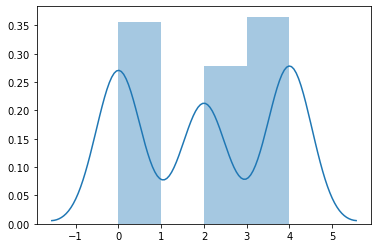

In [57]:
df = raw_test_data.select("polarity").na.drop()
print(f"No of rows with Polarity: {df.count()}/{raw_test_data.count()}")
sns.distplot(df.toPandas())

In [58]:
raw_training_data = spark.read.options(delimiter=',').schema("polarity Float, text STRING").csv("training.1600000.processed.noemoticon.csv")
raw_training_data.printSchema()
raw_training_data.show(20)

root
 |-- polarity: float (nullable = true)
 |-- text: string (nullable = true)

+--------+--------------------+
|polarity|                text|
+--------+--------------------+
|     0.0|@switchfoot http:...|
|     0.0|is upset that he ...|
|     0.0|@Kenichan I dived...|
|     0.0|my whole body fee...|
|     0.0|@nationwideclass ...|
|     0.0|@Kwesidei not the...|
|     0.0|         Need a hug |
|     0.0|@LOLTrish hey  lo...|
|     0.0|@Tatiana_K nope t...|
|     0.0|@twittera que me ...|
|     0.0|spring break in p...|
|     0.0|I just re-pierced...|
|     0.0|@caregiving I cou...|
|     0.0|@octolinz16 It it...|
|     0.0|@smarrison i woul...|
|     0.0|@iamjazzyfizzle I...|
|     0.0|Hollis' death sce...|
|     0.0|about to file taxes |
|     0.0|@LettyA ahh ive a...|
|     0.0|@FakerPattyPattz ...|
+--------+--------------------+
only showing top 20 rows



No of rows with Polarity: 1048555/1048555


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


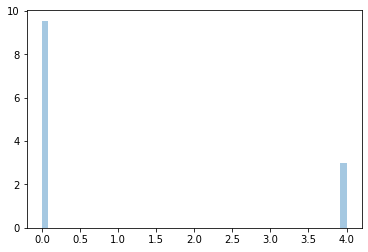

In [59]:
df = raw_training_data.select("polarity").na.drop()
print(f"No of rows with Polarity: {df.count()}/{raw_training_data.count()}")
sns.distplot(df.toPandas())

In [61]:
polariry_df = raw_training_data.select("polarity").cache()

polariry_df.groupBy("polarity").count().toPandas()

,polarity,count
0,4.0,248576
1,0.0,799979


In [73]:
OUTPUT_PATH = "./RAW/"
raw_training_data.repartition(20).write.partitionBy("polarity").csv(OUTPUT_PATH, mode="overwrite")

Py4JJavaError: An error occurred while calling o528.csv.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:231)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:178)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:108)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:106)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.doExecute(commands.scala:131)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:127)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:126)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:962)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:767)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:962)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:414)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:398)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:287)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:952)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 5 in stage 30.0 failed 1 times, most recent failure: Lost task 5.0 in stage 30.0 (TID 411, vannhinh-ng02.ea.corp.samsungelectronics.net, executor driver): org.apache.spark.SparkException: Task failed while writing rows.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:296)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:210)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:463)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:466)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 E:\spark\spark-3.0.3-bin-hadoop2.7\BTGK\RAW\_temporary\0\_temporary\attempt_202201171657426473507541072125269_0030_m_000005_411\polarity=0.0\part-00005-8f8eabf8-e160-4db7-8fbf-4d4e781d4c79.c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.DynamicPartitionDataWriter.newOutputWriter(FileFormatDataWriter.scala:241)
	at org.apache.spark.sql.execution.datasources.DynamicPartitionDataWriter.write(FileFormatDataWriter.scala:262)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$executeTask$1(FileFormatWriter.scala:278)
	at org.apache.spark.util.Utils$.tryWithSafeFinallyAndFailureCallbacks(Utils.scala:1411)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:286)
	... 9 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2114)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:200)
	... 33 more
Caused by: org.apache.spark.SparkException: Task failed while writing rows.
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:296)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$15(FileFormatWriter.scala:210)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:127)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:463)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1377)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:466)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 E:\spark\spark-3.0.3-bin-hadoop2.7\BTGK\RAW\_temporary\0\_temporary\attempt_202201171657426473507541072125269_0030_m_000005_411\polarity=0.0\part-00005-8f8eabf8-e160-4db7-8fbf-4d4e781d4c79.c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.DynamicPartitionDataWriter.newOutputWriter(FileFormatDataWriter.scala:241)
	at org.apache.spark.sql.execution.datasources.DynamicPartitionDataWriter.write(FileFormatDataWriter.scala:262)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$executeTask$1(FileFormatWriter.scala:278)
	at org.apache.spark.util.Utils$.tryWithSafeFinallyAndFailureCallbacks(Utils.scala:1411)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:286)
	... 9 more


In [76]:
spark.sql("set spark.sql.legacy.tomeParserPolicy=LEGACY")

schema_ddl =  "polarity Float, id LONG, date TIMESTAMP, query STRING, user STRING, text STRING"
spark_reader = spark.read.schema(schema_ddl)

simple_date_format = "EEE MMM dd HH:mm:ss zzz yyyy"
RAW_PATH = "./testdata.manual.2009.06.14.csv"
raw_data = spark_reader.csv(RAW_PATH, timestampFormat=simple_date_format)
raw_data.show(10)
raw_data.printSchema()

raw_data.summary().show()

+--------+---+-------------------+-------+------------+--------------------+
|polarity| id|               date|  query|        user|                text|
+--------+---+-------------------+-------+------------+--------------------+
|     4.0|  3|2009-05-11 10:17:40|kindle2|      tpryan|@stellargirl I lo...|
|     4.0|  4|2009-05-11 10:18:03|kindle2|      vcu451|Reading my kindle...|
|     4.0|  5|2009-05-11 10:18:54|kindle2|      chadfu|Ok, first assesme...|
|     4.0|  6|2009-05-11 10:19:04|kindle2|       SIX15|@kenburbary You'l...|
|     4.0|  7|2009-05-11 10:21:41|kindle2|    yamarama|@mikefish  Fair e...|
|     4.0|  8|2009-05-11 10:22:00|kindle2|GeorgeVHulme|@richardebaker no...|
|     0.0|  9|2009-05-11 10:22:30|    aig|     Seth937|Fuck this economy...|
|     4.0| 10|2009-05-11 10:26:10| jquery|   dcostalis|Jquery is my new ...|
|     4.0| 11|2009-05-11 10:27:15|twitter|     PJ_King|       Loves twitter|
|     4.0| 12|2009-05-11 10:29:20|  obama| mandanicole|how can you not l...|

In [77]:
user_regex = r"(@\w{1,15})"

raw_data.select(
    f.array_remove(
        f.array(
            f.regexp_extract(f.col("text"),user_regex,1),
            f.regexp_extract(
                f.col("text"),"".join([f"{user_regex}.*?" for i in range(0,2)]), 2      
            ),
            f.regexp_extract(
                f.col("text"),"".join([f"{user_regex}.*?" for i in range(0,3)]), 3      
            ),
            f.regexp_extract(
                f.col("text"),"".join([f"{user_regex}.*?" for i in range(0,4)]), 4      
            ),
            f.regexp_extract(
                f.col("text"),"".join([f"{user_regex}.*?" for i in range(0,5)]), 5      
            ),
            f.regexp_extract(
                f.col("text"),"".join([f"{user_regex}.*?" for i in range(0,6)]), 6      
            ),
        ),
        "",
    ).alias("users_mentioned"),
    "text",
).toPandas().head(35)

,users_mentioned,text
0,[@stellargirl],@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,[],Reading my kindle2... Love it... Lee childs i...
2,[],"Ok, first assesment of the #kindle2 ...it fuck..."
3,[@kenburbary],@kenburbary You'll love your Kindle2. I've had...
4,[@mikefish],@mikefish Fair enough. But i have the Kindle2...
5,[@richardebaker],@richardebaker no. it is too big. I'm quite ha...
6,[],Fuck this economy. I hate aig and their non lo...
7,[],Jquery is my new best friend.
8,[],Loves twitter
9,[],how can you not love Obama? he makes jokes abo...


In [86]:
raw_data.select(
    f.regexp_replace(f.col("text"), user_regex, "").alias("text"),
    f.col("text").alias("original_text"),
).toPandas().head(20)

,text,original_text
0,I loooooooovvvvvveee my Kindle2. Not that the...,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...
2,"Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck..."
3,You'll love your Kindle2. I've had mine for a...,@kenburbary You'll love your Kindle2. I've had...
4,Fair enough. But i have the Kindle2 and I th...,@mikefish Fair enough. But i have the Kindle2...
5,no. it is too big. I'm quite happy with the K...,@richardebaker no. it is too big. I'm quite ha...
6,Fuck this economy. I hate aig and their non lo...,Fuck this economy. I hate aig and their non lo...
7,Jquery is my new best friend.,Jquery is my new best friend.
8,Loves twitter,Loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love Obama? he makes jokes abo...


In [85]:
hashtag_replace_regrex = "#(\w{1,})"

_.select(f.regexp_replace(f.col("text"), hashtag_replace_regrex, "$1"), "hashtags").show(35,100)


AttributeError: 'DataFrame' object has no attribute 'select'

In [99]:
hashtag_replace_regrex = "#(\w{1,})"
raw_data.select(
    f.regexp_replace(f.col("text"), hashtag_replace_regrex, "$1"),
    "hashtags"
).show(35,100)

AnalysisException: cannot resolve '`hashtags`' given input columns: [date, id, polarity, query, text, user];;
'Project [regexp_replace(text#1613, #(\w{1,}), $1) AS regexp_replace(text, #(\w{1,}), $1)#2408, 'hashtags]
+- Relation[polarity#1608,id#1609L,date#1610,query#1611,user#1612,text#1613] csv


In [100]:
url_regex = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
email_regex = r"/\S+@\S+\.\S+/"

In [101]:
raw_data.select(
    f.regexp_replace(f.col("text"), email_regex,"").alias("text_no_email"),
    f.regexp_replace(f.col("text"), url_regex,"").alias("text_no_url"),
    f.col("text").alias("original_text"),
).toPandas().head(20)

,text_no_email,text_no_url,original_text
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,@stellargirl I loooooooovvvvvveee my Kindle2. ...,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...,Reading my kindle2... Love it... Lee childs i...
2,"Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck...","Ok, first assesment of the #kindle2 ...it fuck..."
3,@kenburbary You'll love your Kindle2. I've had...,@kenburbary You'll love your Kindle2. I've had...,@kenburbary You'll love your Kindle2. I've had...
4,@mikefish Fair enough. But i have the Kindle2...,@mikefish Fair enough. But i have the Kindle2...,@mikefish Fair enough. But i have the Kindle2...
5,@richardebaker no. it is too big. I'm quite ha...,@richardebaker no. it is too big. I'm quite ha...,@richardebaker no. it is too big. I'm quite ha...
6,Fuck this economy. I hate aig and their non lo...,Fuck this economy. I hate aig and their non lo...,Fuck this economy. I hate aig and their non lo...
7,Jquery is my new best friend.,Jquery is my new best friend.,Jquery is my new best friend.
8,Loves twitter,Loves twitter,Loves twitter
9,how can you not love Obama? he makes jokes abo...,how can you not love Obama? he makes jokes abo...,how can you not love Obama? he makes jokes abo...


In [92]:
user_regex = r"(@\w{1,15})"
hashtag_replace_regex= "#(\w{1,})"
url_regex = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
email_regex = r"/\S+@\S+\.\S+/"
spectial_character = "[^A-Za-z0-9]"
from pyspark.sql.functions import trim
def cleaning(df):  
    df = df.withColumn("text", f.regexp_replace(f.col("text"),user_regex, ""))
    df = df.withColumn("text", f.regexp_replace(f.col("text"),hashtag_replace_regex, ""))
    df = df.withColumn("text", f.regexp_replace(f.col("text"),email_regex, ""))
    df = df.withColumn("text", f.regexp_replace(f.col("text"),url_regex, ""))
    df = df.withColumn("text", f.regexp_replace(f.col("text"),spectial_character, " "))
    df = df.withColumn("text", f.trim(f.col("text")))  
    df = df.withColumn("text", f.regexp_replace(f.col("text"),"  *", " "))    
    df = df.withColumn("text", f.lower(f.col("text"))) 
    return df